## **Librerías**

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = False

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity

In [217]:
import warnings
warnings.filterwarnings('ignore')

## **Data**

In [7]:
ratings = pd.read_csv("../../Data/Raw/ratings.csv")
ratings.shape

(100836, 4)

In [ ]:
ratings.sample()

,userId,movieId,rating,timestamp
92124,596,135569,4.5,1535709626


In [12]:
movies = pd.read_csv("../../Data/Raw/movies.csv")
movies.shape

(9742, 3)

In [13]:
movies.sample()

,movieId,title,genres
4902,7347,Secret Window (2004),Mystery|Thriller


## **Construcción de variables**

In [17]:
ratings.sample()

,userId,movieId,rating,timestamp
57872,380,81229,4.5,1508805432


In [27]:
user_ratings = ratings[['userId', 'rating']].groupby(['userId']).count().reset_index()
user_ratings.columns = ['user_Id', 'n_rarings']
user_ratings.sample()

,user_Id,n_rarings
340,341,52


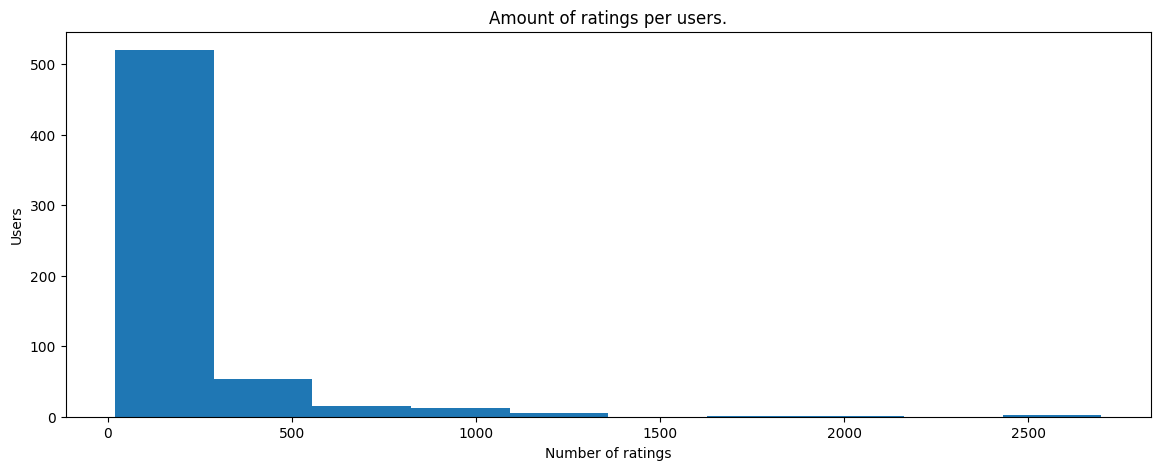

In [65]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.hist(user_ratings['n_rarings'])

plt.title('Amount of ratings per users.')

ax.set_xlabel('Number of ratings')
ax.set_ylabel('Users')

plt.show()

### **Matriz Usuario-Elemento**

In [70]:
X = pd.pivot(
    ratings,
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)

In [73]:
user_index_to_id = {i:j for i, j in enumerate(X.columns)}
movie_index_to_id = {i:j for i, j in enumerate(X.index)}

user_id_to_index = {j:i for i, j in enumerate(X.columns)}
movie_id_to_index = {j:i for i, j in enumerate(X.index)}

## **Sistema de Recomendaciones**

### **Recomendaciones basadas en peliculas**

In [139]:
def recommendation_system(target_movie_id, k, metric='cosine'):

    movie_id = movie_id_to_index[target_movie_id]
    movie_vec = X.values[movie_id].reshape(1, -1)

    knn = NearestNeighbors(n_neighbors=k+1, metric=metric).fit(X)

    a, neigh_id = knn.kneighbors(movie_vec)

    recommendations = [movie_index_to_id[neigh_id[0][i]] for i in range(k+1)]

    movie = recommendations[0]

    recommendations.pop(0)

    movie_titles = dict(zip(movies['movieId'], movies['title']))
    recommended_movies = [movie_titles[i] for i in recommendations]

    # return recommendations
    print(f'For the movie: {movie_titles[movie]}')
    print(recommended_movies)

In [180]:
recommendation_system(32, 5)

For the movie: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
['Pulp Fiction (1994)', 'Terminator 2: Judgment Day (1991)', 'Independence Day (a.k.a. ID4) (1996)', 'Seven (a.k.a. Se7en) (1995)', 'Fargo (1996)']


### **Recomendaciones basadas en el usuario**

In [221]:
def recommendation_for_user(target_user_id, k):
    
    user_ratings = ratings.query(f'userId == {target_user_id}') 
    favourite_movie = user_ratings.query(f'rating == {user_ratings['rating'].max()}').iloc[0]

    target_movie_id = movies.query(f'movieId == {favourite_movie["movieId"]}')
    target_movie_id = int(target_movie_id['movieId'])
     
    similar_movies = recommendation_system(target_movie_id, k)

    print(similar_movies)

In [224]:
recommendation_for_user(15, 5)

For the movie: Star Wars: Episode IV - A New Hope (1977)
['Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Matrix, The (1999)', 'Indiana Jones and the Last Crusade (1989)']
None
